# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [12]:
import pandas as pd
import numpy as np 
df = pd.read_csv('/Users/bridgetjames/Documents/LaunchCode/Final Graded Assignment/IMDB Movies 2000 - 2020.csv')

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [13]:
# Printing first few rows of data to see what information is included in each column.
df.head()
print(df.to_string(index=False))

imdb_title_id                                                                                  title                                                                      original_title  year date_published                         genre  duration                                                                                                             country              language_1               language_2                        language_3                                             director                                                       writer                                                                                                                                                                                                                                                                                                                                     actors                      actors_1                                     actors_f2                                   

In [14]:
# Using info function to get a summary of my DataFrame. Here, I can see the number of non-null values for each column. It looks like I have about 15 (out of 23) columns that contain zero null values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487 entries, 0 to 5486
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          5487 non-null   object 
 1   title                  5487 non-null   object 
 2   original_title         5487 non-null   object 
 3   year                   5487 non-null   int64  
 4   date_published         5487 non-null   object 
 5   genre                  5487 non-null   object 
 6   duration               5487 non-null   int64  
 7   country                5487 non-null   object 
 8   language_1             5483 non-null   object 
 9   language_2             2170 non-null   object 
 10  language_3             931 non-null    object 
 11  director               5487 non-null   object 
 12  writer                 5483 non-null   object 
 13  actors                 5486 non-null   object 
 14  actors_1               5487 non-null   object 
 15  acto

In [15]:
# Printing data types of each column to where descriptive statistics would be pertinent.
print(df.dtypes)

# Columns to explore: duration, year (min and max), date_published? (min and max), director (occurrences), writer (occurrences), actors (occurrences)?, votes, usa_gross_income, reviews_from_users

imdb_title_id             object
title                     object
original_title            object
year                       int64
date_published            object
genre                     object
duration                   int64
country                   object
language_1                object
language_2                object
language_3                object
director                  object
writer                    object
actors                    object
actors_1                  object
actors_f2                 object
description               object
desc35                    object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income         float64
worlwide_gross_income     object
reviews_from_users       float64
dtype: object


In [16]:
# Average movie duration: 109.52 minutes
Average_duration = df['duration'].mean().round(2)
print(Average_duration)

# Finding earliest and most recent movie
OldestYear = df['year'].min()
NewestYear = df['year'].max()
print(OldestYear)
print(NewestYear)
# Earliest movie was released in 2000, and the most recent is from 2020.

# Finding most popular director
df['director'].nunique()

# There are 2661 unique directors in this dataset
df['director'].mode()
# The two most commonly occurring directors in this dataset are Steven Soderbergh and Woody Allen 
# Double Check:
df['director'].value_counts() 

109.52
2000
2020


director
Woody Allen                          19
Steven Soderbergh                    19
Clint Eastwood                       17
Ridley Scott                         15
Richard Linklater                    14
                                     ..
Vondie Curtis-Hall                    1
Jeff Zimbalist, Michael Zimbalist     1
Lucía Puenzo                          1
Olly Blackburn                        1
Jérémy Clapin                         1
Name: count, Length: 2661, dtype: int64

In [17]:
# Finding most commonly occuring actor:
df['actors_1'].nunique()
# There are 2451 unique actors in actors_1 column
df['actors_1'].value_counts()
# The most represented actor in this dataset is Nicolas Cage, and the second is Adam Sandler.
df['actors_1'].mode()

df['actors'].nunique()
# There are 5482 unique values in the 'actors' column. This is to be expected since this column lists all of the actors in each movie. 
# If a value in this column is counted more than once, we might assume this is part of a series of movies, or that there are duplicate values in the dataset.
df['actors'].mode()
df['actors'].value_counts()

actors
Ian McKellen, Martin Freeman, Richard Armitage, Ken Stott, Graham McTavish, William Kircher, James Nesbitt, Stephen Hunter, Dean O'Gorman, Aidan Turner, John Callen, Peter Hambleton, Jed Brophy, Mark Hadlow, Adam Brown                                   3
Kurt Russell, Zoë Bell, Rosario Dawson, Vanessa Ferlito, Sydney Tamiia Poitier, Tracie Thoms, Rose McGowan, Jordan Ladd, Mary Elizabeth Winstead, Quentin Tarantino, Marcy Harriell, Eli Roth, Omar Doom, Michael Bacall, Monica Staggs                      2
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson, Donald Sutherland, Philip Seymour Hoffman, Julianne Moore, Willow Shields, Sam Claflin, Elizabeth Banks, Mahershala Ali, Jena Malone, Jeffrey Wright, Paula Malcomson, Stanley Tucci    2
Meg Ryan, Hugh Jackman, Liev Schreiber, Breckin Meyer, Natasha Lyonne, Bradley Whitford, Paxton Whitehead, Spalding Gray, Josh Stamberg, Matthew Sussman, Charlotte Ayanna, Philip Bosco, Andrew Jack, Stan Tracy, Kristen Schaal   

In [18]:
# Finding most commonly occurring genre:
df['genre'].nunique()
# There are 336 unique genres represented in this dataset
df['genre'].mode()
df['genre'].value_counts()
# Comedy, Drama, Romance is the most commonly occurring value in the dataset. Here we can see that the "genre" column may contain multiple genres listed per record. Comedy, Drama, Romance is the most common combination it seems.

genre
Comedy, Drama, Romance      293
Comedy, Drama               240
Drama                       207
Drama, Romance              181
Comedy, Romance             174
                           ... 
Action, Comedy, Mystery       1
Drama, Family, Musical        1
Drama, Horror, Musical        1
Animation, Crime, Drama       1
Comedy, Fantasy, Mystery      1
Name: count, Length: 336, dtype: int64

In [19]:
# Which movie has the most and least votes?
df.groupby(['original_title'])['votes'].max()
df.groupby(['original_title'])['votes'].min()
# (500) Days of Summer has the most votes, and Üç Maymun has the least number of votes, as well as the highest and lowest avg vote, respectively.
# Realized at this point that the "title" column is not in english! The original_title column is mostly in english. 

# Which movies have the highest and lowest avg vote?
df.groupby(['original_title'])['avg_vote'].max()
df.groupby(['original_title'])['avg_vote'].min()
# Same movies as above. To be expected.

original_title
(500) Days of Summer                  7.7
(T)Raumschiff Surprise - Periode 1    5.4
0.098611111                           5.8
0.468055556                           7.2
1 - Nenokkadine                       8.1
                                     ... 
À ma soeur!                           6.5
Æon Flux                              5.5
Çalgi Çengi                           7.1
Ölümlü Dünya                          7.7
Üç Maymun                             7.4
Name: avg_vote, Length: 5445, dtype: float64

In [20]:
# Finding movies with highest and lowest budgets:
df['budget'].mode()
df.groupby(['original_title'])['budget'].value_counts()
# Budget column contains inconsistent currency types. Data type is object, rather than integer. Will need to clean this before drawing conclusions about which movies had highest and lowest budgets.

# Finding highest and lowest US gross income:
df['usa_gross_income'].max()
# 936662225.0

df['usa_gross_income'].min()
# 383.0

np.float64(383.0)

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

Text(0.5, 1.0, 'Votes per Year')

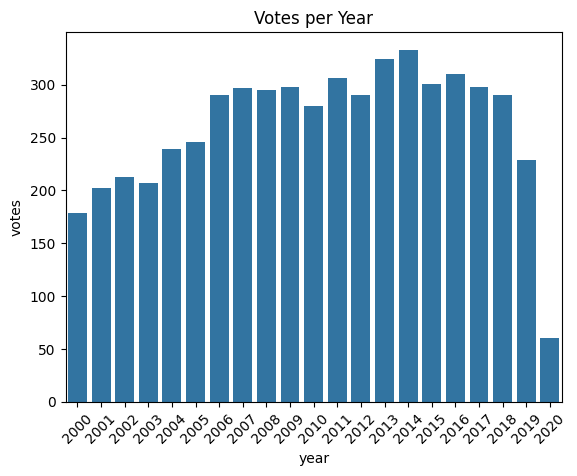

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
df['year'].dtype
df['votes'].dtype
data = df.groupby(['year'])['votes'].count()
plot = sns.barplot(data=data)
plt.xticks(rotation=45)
plt.title("Votes per Year")
# Which year were the most voted for movies released?

Text(0.5, 1.0, 'Movies Released per Year')

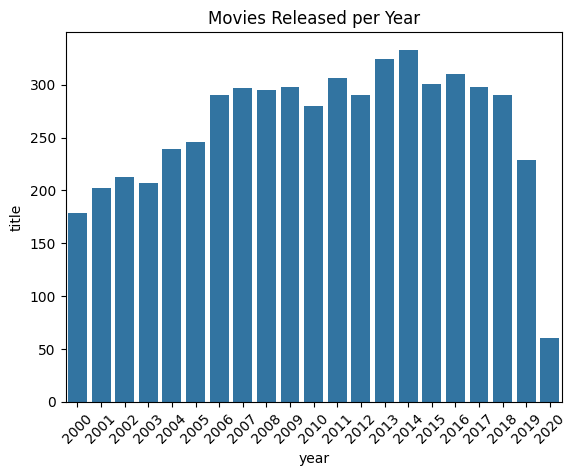

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns
df['year'].dtype
df['votes'].dtype
data = df.groupby(['year'])['title'].count()
plot = sns.barplot(data=data)
plt.xticks(rotation=45)
plt.title("Movies Released per Year")
# Plotting the number of movies released per year. This info may correlate with the previous bar plot which displays the most voted for movies per year. 

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? I learned that the "title" column is not in english, whereas the "original title" column is mostly in english. 
2. Do you have any concerns about your dataset? The "votes" and "average vote" columns are a bit confusing. I cannot quite tell if these columns provide information about movie ratings. I am not sure what the "voting" would be for. In the cleaning of data, I'm gonna have to dive deeper into these columns to figure this out. 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? There are null values in a few columns that I will have to address. Some columns contain information about language, which may not be pertinent to my business issue. The "budget" column does not have consistent data. Some records contain what can be assumed to be U.S. Currency, whereas others as labeled as "EUR", etc,. 